In [68]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [70]:
x = df.iloc[:,1:2].values
y = df.iloc[:,2:].values

In [71]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [72]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## In Support Vector Regression we need to feature scalling our data

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
x_sc = StandardScaler()
x = x_sc.fit_transform(x)

In [75]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [76]:
y_sc = StandardScaler()
y = y_sc.fit_transform(y)

In [77]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Data Visualize

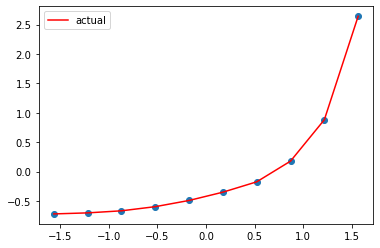

In [94]:
plt.scatter(x,y)
plt.plot(x,y,color='red',label="actual")
plt.legend(loc='upper left')
plt.show()

## Fitting svr to dataset

In [79]:
from sklearn.svm import SVR

##### SVM algorithms use a set of mathematical functions that are defined as the kernel.For example linear, nonlinear, polynomial, radial basis function (RBF), and sigmoid.
#### We will use gausian rbf as we can see that our dataset is not linear in plot

In [80]:
regressor = SVR(kernel = 'rbf')

In [81]:
regressor.fit(x,y)

/home/jspw/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predict 

In [82]:
y_pred = y_sc.inverse_transform(regressor.predict(x_sc.fit_transform(np.array([[6.5]]))))
y_pred

array([131106.77303274])

## Visualize 

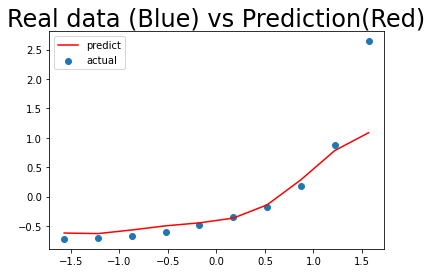

In [95]:
plt.title(label = "Real data (Blue) vs Prediction(Red)",fontdict={'fontsize':24})
plt.scatter(x,y,label="actual")
plt.plot(x,regressor.predict(x),color='red',label="predict")
plt.legend(loc='upper left')
plt.show()